In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Baixar pacotes do NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Carregar os dados
df = pd.read_csv(r"C:\Users\Rebeca\Desktop\LAB. DESENV. BD VI\Classificação\IMDB Dataset.csv")
df = df.sample(frac=1, random_state=42)  # Embaralhar os dados

# Verificar estrutura
print(df.head())

# Função de pré-processamento do texto
def preprocess_text(text):
    text = text.lower()  # Converter para minúsculas
    text = re.sub(r'\W', ' ', text)  # Remover caracteres especiais
    tokens = word_tokenize(text)  # Tokenizar
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remover stopwords
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]  # Aplicar stemming
    return ' '.join(tokens)

# Aplicando o pré-processamento
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Converter rótulos para numérico
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rebeca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rebeca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                review sentiment
453  Mom should really be given a different title t...  positive
793  I love this young people trapped in a house of...  positive
209  This film is well cast, often silly and always...  positive
309  This is the best film the Derek couple has eve...  negative
740  What a waste of talent. A very poor, semi-cohe...  negative


Métricas - Naive Bayes
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       100
           1       0.91      0.79      0.84       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



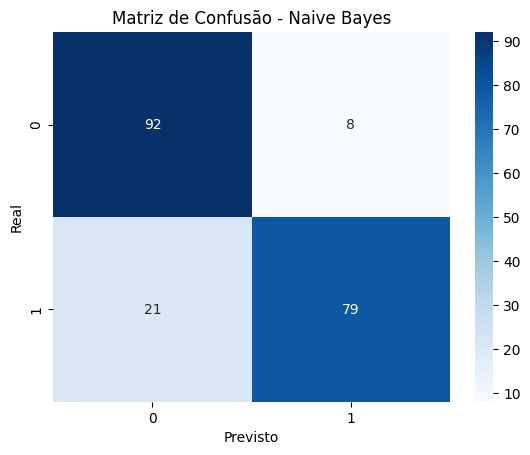

In [3]:
## Naive Bayes (MultinomialNB)

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

# Vetorização usando TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Treinar o modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Fazer previsões
y_pred_nb = nb_model.predict(X_test_tfidf)

# Avaliação do modelo
print("Métricas - Naive Bayes")
print(classification_report(y_test, y_pred_nb))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Naive Bayes")
plt.show()


Métricas - Árvore de Decisão
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       100
           1       0.72      0.64      0.68       100

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200



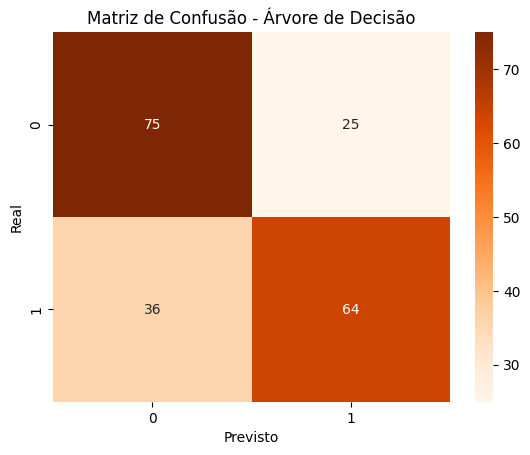

In [4]:
## Árvore de Decisão (DecisionTreeClassifier)

from sklearn.tree import DecisionTreeClassifier

# Treinar o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

# Fazer previsões
y_pred_dt = dt_model.predict(X_test_tfidf)

# Avaliação do modelo
print("Métricas - Árvore de Decisão")
print(classification_report(y_test, y_pred_dt))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

Métricas - Random Forest
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       100
           1       0.86      0.84      0.85       100

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



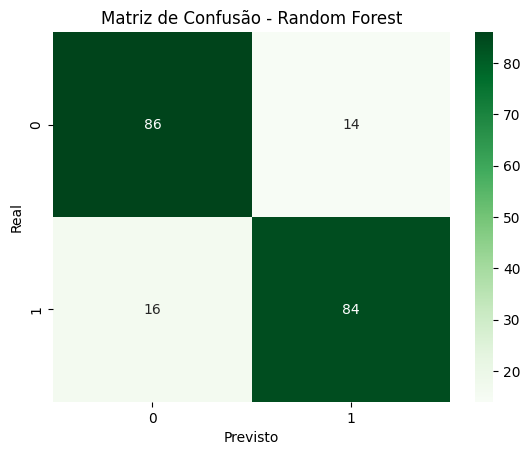

In [5]:
## Random Forest (RandomForestClassifier)

from sklearn.ensemble import RandomForestClassifier

# Treinar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(X_test_tfidf)

# Avaliação do modelo
print("Métricas - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

Métricas - SVM
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       100
           1       0.84      0.85      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



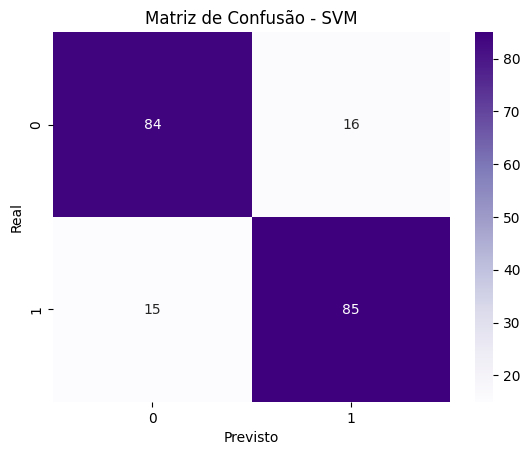

In [ ]:
## Support Vector Machine (SVM)

from sklearn.svm import SVC

# Treinar o modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Fazer previsões
y_pred_svm = svm_model.predict(X_test_tfidf)

# Avaliação do modelo
print("Métricas - SVM")
print(classification_report(y_test, y_pred_svm))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Purples")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM")
plt.show()

Métricas - Rede Neural
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.80      0.82      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



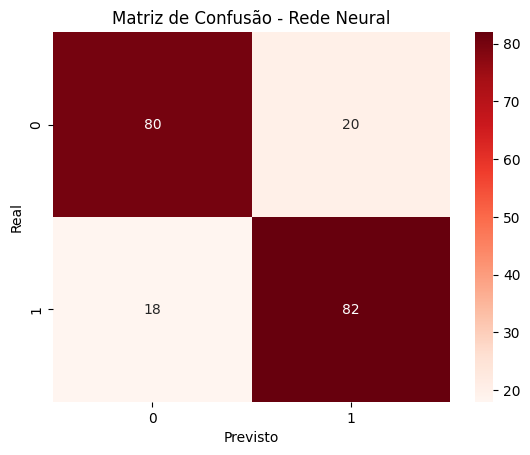

In [7]:
## Rede Neural (MLPClassifier)

from sklearn.neural_network import MLPClassifier

# Treinar o modelo MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
mlp_model.fit(X_train_tfidf, y_train)

# Fazer previsões
y_pred_mlp = mlp_model.predict(X_test_tfidf)

# Avaliação do modelo
print("Métricas - Rede Neural")
print(classification_report(y_test, y_pred_mlp))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt="d", cmap="Reds")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Rede Neural")
plt.show()

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhores parâmetros: {'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}
Métricas - SVM Otimizado
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       100
           1       0.84      0.85      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



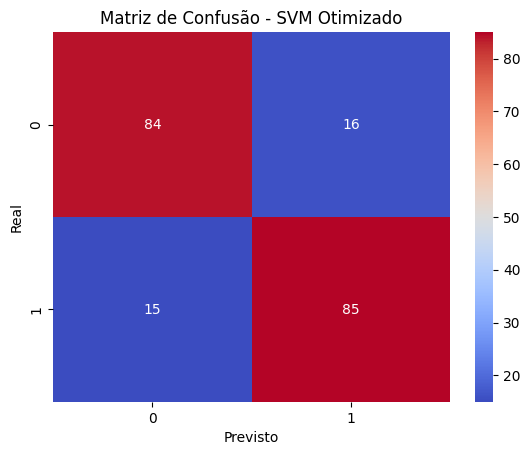

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir os parâmetros a testar
param_grid = {
    'C': [0.1, 1, 10],  # Testando diferentes penalizações
    'kernel': ['linear'], 
    'class_weight': [None, 'balanced']
}

# Criar o modelo base
svc = SVC(random_state=42)

# Criar o GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,
                           scoring='f1_macro', cv=5, verbose=2, n_jobs=-1)

# Rodar o Grid Search nos dados de treino
grid_search.fit(X_train_tfidf, y_train)

# Ver os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

# Avaliar o modelo com os melhores parâmetros no conjunto de teste
best_svm = grid_search.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_tfidf)

print("Métricas - SVM Otimizado")
print(classification_report(y_test, y_pred_best_svm))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred_best_svm), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM Otimizado")
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros: {'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}
Métricas - SVM Ajustado
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       100
           1       0.84      0.85      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



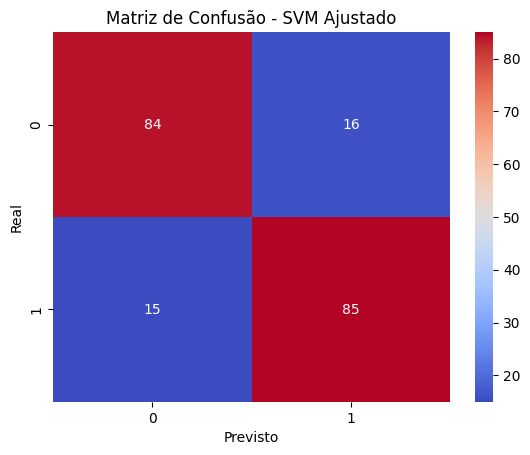

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Novo grid com mais opções
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear'],
    'class_weight': [None, 'balanced']
}

svc = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,
                           scoring='f1_macro', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_tfidf, y_train)

print("Melhores parâmetros:", grid_search.best_params_)

# Avaliar o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_tfidf)

print("Métricas - SVM Ajustado")
print(classification_report(y_test, y_pred_best))

sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM Ajustado")
plt.show()


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
🌳 Melhores parâmetros - Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

📊 Métricas - Árvore de Decisão Ajustada
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       100
           1       0.75      0.69      0.72       100

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200

Acurácia: 0.73


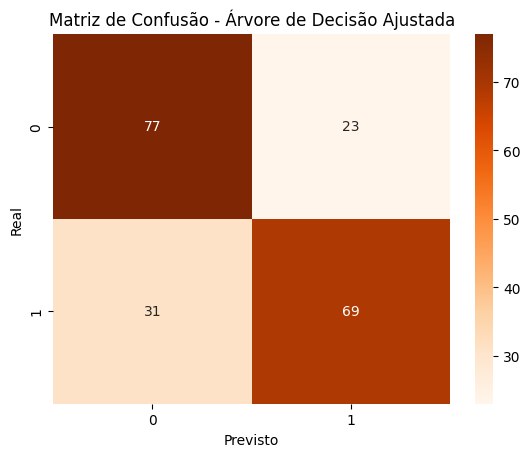

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Definir o modelo base
dt_model = DecisionTreeClassifier(random_state=42)

# Grade de hiperparâmetros para ajuste fino - para encontrar melhor combinaçao
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, 25, None], # Profundidade max da arvore
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Treinar o modelo com a melhor combinação de parâmetros
grid_search.fit(X_train_tfidf, y_train)

# Obter o melhor modelo
best_dt = grid_search.best_estimator_

# Fazer previsões
y_pred_best_dt = best_dt.predict(X_test_tfidf)

# Avaliação do modelo
print("Melhores parâmetros - Decision Tree:", grid_search.best_params_)
print("\nMétricas - Árvore de Decisão Ajustada")
print(classification_report(y_test, y_pred_best_dt))
print("Acurácia:", accuracy_score(y_test, y_pred_best_dt))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred_best_dt), annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Árvore de Decisão Ajustada")
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits
🌳 Melhores parâmetros - Decision Tree Refinada:
{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

📊 Métricas - Árvore de Decisão Refinada
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       100
           1       0.75      0.69      0.72       100

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



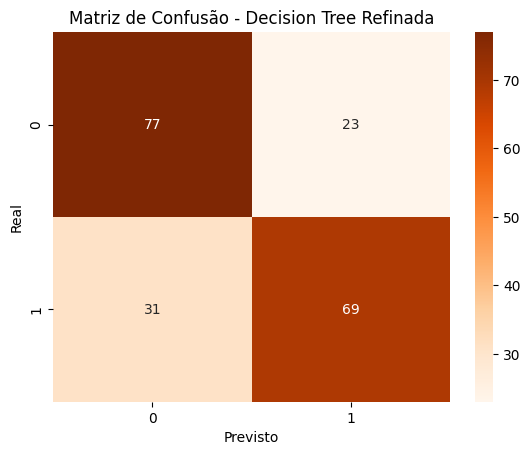

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Grade refinada de hiperparâmetros
param_grid_refinada = {
    'criterion': ['gini'],
    'max_depth': [18, 20, 22],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5],
    'max_features': [None]
}

# Instanciar o modelo base
dt_model = DecisionTreeClassifier(random_state=42)

# GridSearch com validação cruzada
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_refinada,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Treinar com dados TF-IDF
grid_search.fit(X_train_tfidf, y_train)

# Melhor modelo
best_dt_model = grid_search.best_estimator_

# Avaliação com os dados de teste
y_pred_dt = best_dt_model.predict(X_test_tfidf)

# Resultados
print(" Melhores parâmetros - Decision Tree Refinada:")
print(grid_search.best_params_)

print("\n Métricas - Árvore de Decisão Refinada")
print(classification_report(y_test, y_pred_dt))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Decision Tree Refinada")
plt.show()
